In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as pyplot

from sklearn.model_selection import train_test_split
from DataReader import load_urm, load_icm, load_target
from Evaluation.Evaluator import EvaluatorHoldout
from Data_manager.split_functions.split_train_validation_random_holdout import split_train_in_two_percentage_global_sample
from sklearn import feature_extraction

In [3]:
URM_all = load_urm()

ICM_length = load_icm("data_ICM_length.csv", weight=1)
ICM_type = load_icm("data_ICM_type.csv", weight=1)
ICM_all = sp.sparse.hstack([ICM_length, ICM_type]).tocsr()

In [4]:
URM_all

<41629x24507 sparse matrix of type '<class 'numpy.int32'>'
	with 1051828 stored elements in Compressed Sparse Row format>

In [5]:
ICM_all

<27968x9 sparse matrix of type '<class 'numpy.int64'>'
	with 46182 stored elements in Compressed Sparse Row format>

In [8]:
ICM_length = pd.read_csv('Dataset/data_ICM_length.csv')
ICM_data = pd.read_csv('Dataset/data_ICM_type.csv')
users_test = pd.read_csv('Dataset/data_target_users_test.csv')
URM_all_dataframe = pd.read_csv('Dataset/URM_updated.csv')

In [9]:
URM_all_dataframe

,UserID,ItemID,Data
0,0,21,1
1,0,124,1
2,0,808,1
3,0,1326,1
4,0,1995,1
...,...,...,...
1051823,41628,15971,1
1051824,41628,19992,1
1051825,41628,20448,1
1051826,41628,22882,1


In [10]:
URM_all_dataframe.head(n=10)

,UserID,ItemID,Data
0,0,21,1
1,0,124,1
2,0,808,1
3,0,1326,1
4,0,1995,1
5,0,5068,1
6,0,7603,1
7,0,8540,1
8,0,10682,1
9,0,13290,1


In [11]:
userID_unique = URM_all_dataframe["user_id"].unique()
itemID_unique = URM_all_dataframe["item_id"].unique()

n_users = len(userID_unique)
n_items = len(itemID_unique)
n_interactions = len(URM_all_dataframe)

print ("Number of items\t {}, Number of users\t {}".format(n_items, n_users))
print ("Max ID items\t {}, Max Id users\t {}\n".format(max(itemID_unique), max(userID_unique)))
print ("Number of interactions {}".format(n_interactions))
print ("Average interactions per user {:.2f}".format(n_interactions/n_users))
print ("Average interactions per item {:.2f}\n".format(n_interactions/n_items))

print ("Sparsity {:.2f} %".format((1-float(n_interactions)/(n_items*n_users))*100))

KeyError: 'user_id'

## Item Interactions

In [12]:
item_popularity = np.ediff1d(URM_all.tocsc().indptr)
item_popularity

array([19, 35, 26, ..., 14, 13, 12], dtype=int32)

In [13]:
item_popularity = np.sort(item_popularity)
item_popularity

array([   3,    4,    5, ..., 4676, 5366, 7382], dtype=int32)

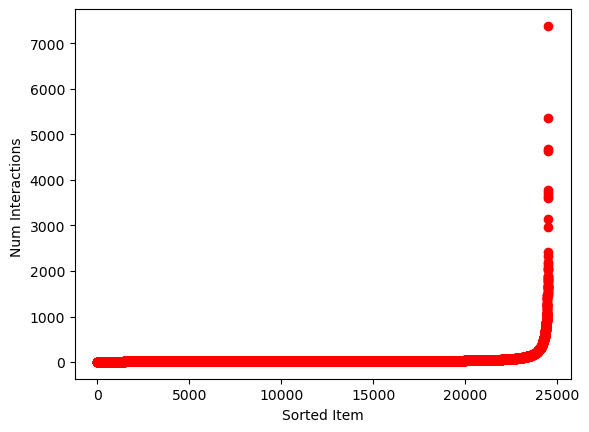

In [14]:
pyplot.plot(item_popularity, 'ro')
pyplot.ylabel('Num Interactions ')
pyplot.xlabel('Sorted Item')
pyplot.show()

In [15]:
ten_percent = int(n_items/10)

print("Average per-item interactions over the whole dataset {:.2f}".
      format(item_popularity.mean()))

print("Average per-item interactions for the top 10% popular items {:.2f}".
      format(item_popularity[-ten_percent:].mean()))

print("Average per-item interactions for the least 10% popular items {:.2f}".
      format(item_popularity[:ten_percent].mean()))

print("Average per-item interactions for the median 10% popular items {:.2f}".
      format(item_popularity[int(n_items*0.45):int(n_items*0.55)].mean()))

NameError: name 'n_items' is not defined

## User Interaction

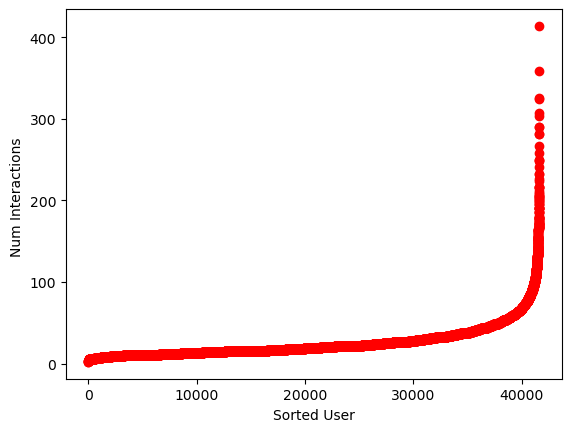

In [16]:
user_activity = np.ediff1d(URM_all.tocsr().indptr)
user_activity = np.sort(user_activity)


pyplot.plot(user_activity, 'ro')
pyplot.ylabel('Num Interactions ')
pyplot.xlabel('Sorted User')
pyplot.show()